In [5]:

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [6]:
df=pd.read_csv("Churn_Modelling.csv")

In [7]:
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
df.shape

(10000, 14)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [10]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [11]:
df.duplicated().sum()

np.int64(0)

In [12]:
df["Exited"].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [13]:
df["Gender"].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [14]:
df["Geography"].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [15]:
df["NumOfProducts"].value_counts()

NumOfProducts
1    5084
2    4590
3     266
4      60
Name: count, dtype: int64

In [16]:
df.drop(columns=["CustomerId","RowNumber","Surname"],inplace=True)

In [17]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [18]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [19]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [20]:
df_encoded=pd.get_dummies(df,columns=["Geography","Gender",],drop_first=True).astype(int)

In [21]:
df_encoded

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0,1,1,1,101348,1,0,0,0
1,608,41,1,83807,1,0,1,112542,0,0,1,0
2,502,42,8,159660,3,1,0,113931,1,0,0,0
3,699,39,1,0,2,0,0,93826,0,0,0,0
4,850,43,2,125510,1,1,1,79084,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0,2,1,0,96270,0,0,0,1
9996,516,35,10,57369,1,1,1,101699,0,0,0,1
9997,709,36,7,0,1,0,1,42085,1,0,0,0
9998,772,42,3,75075,2,1,0,92888,1,1,0,1


In [22]:
X = df_encoded.drop("Exited", axis=1)
y=df_encoded["Exited"]

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [24]:
X_test

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
6252,596,32,3,96709,2,0,0,41788,1,0,1
4684,623,43,1,0,2,1,1,146379,0,0,1
1731,601,44,4,0,2,1,0,58561,0,1,0
4742,506,59,8,119152,2,1,1,170679,1,0,1
4521,560,27,7,124995,1,1,1,114669,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6412,602,53,5,98268,1,0,1,45038,1,0,0
8285,609,25,10,0,1,0,1,109895,0,0,1
7853,730,47,7,0,1,1,0,33373,0,0,0
1095,692,29,4,0,1,1,0,76755,0,0,1


In [25]:
X_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
9254,686,32,6,0,2,1,1,179093,0,0,1
1561,632,42,4,119624,2,1,1,195978,1,0,1
1670,559,24,3,114739,1,1,0,85891,0,1,1
6087,561,27,9,135637,1,1,0,153080,0,0,0
6669,517,56,9,142147,1,0,0,39488,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
5734,768,54,8,69712,1,1,1,69381,0,0,1
5191,682,58,1,0,1,1,1,706,0,0,0
5390,735,38,1,0,3,0,0,92220,0,0,0
860,667,43,8,190227,1,1,0,97508,0,0,1


In [142]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.fit_transform(X_test)

In [143]:
X_train_scaled

array([[ 0.35649971, -0.6557859 ,  0.34567966, ..., -0.57946723,
        -0.57638802,  0.91324755],
       [-0.20389777,  0.29493847, -0.3483691 , ...,  1.72572313,
        -0.57638802,  0.91324755],
       [-0.96147213, -1.41636539, -0.69539349, ..., -0.57946723,
         1.73494238,  0.91324755],
       ...,
       [ 0.86500853, -0.08535128, -1.38944225, ..., -0.57946723,
        -0.57638802, -1.09499335],
       [ 0.15932282,  0.3900109 ,  1.03972843, ..., -0.57946723,
        -0.57638802,  0.91324755],
       [ 0.47065475,  1.15059039, -1.38944225, ...,  1.72572313,
        -0.57638802,  0.91324755]])

In [144]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [145]:
model=Sequential()

model.add(Dense(6,activation="relu",input_shape=(11,)))
model.add(Dense(6,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

C:\Users\91878\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [146]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                     │ (None, 6)                   │              72 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 6)                   │              42 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 1)                   │               7 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 121 (484.00 B)

 Trainable params: 121 (484.00 B)

 Non-trainable params: 0 (0.00 B)

In [149]:
model.compile(loss="binary_crossentropy",optimizer="Adam",metrics=["accuracy"])

In [179]:
history=model.fit(X_train_scaled,y_train,epochs=100,validation_split=0.2,)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8660 - loss: 0.3216 - val_accuracy: 0.8600 - val_loss: 0.3399
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8612 - loss: 0.3263 - val_accuracy: 0.8569 - val_loss: 0.3392
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8560 - loss: 0.3498 - val_accuracy: 0.8569 - val_loss: 0.3394
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8619 - loss: 0.3303 - val_accuracy: 0.8581 - val_loss: 0.3389
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8637 - loss: 0.3305 - val_accuracy: 0.8562 - val_loss: 0.3408
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8692 - loss: 0.3184 - val_accuracy: 0.8562 - val_loss: 0.3401
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8654 - loss: 0.3263 - val_accuracy: 0.8575 - val_loss: 0.3395
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8633 - loss: 0.3314 - val_accu

In [152]:
model.layers[0].get_weights()

[array([[-0.01829397,  0.02670625, -0.00912628, -0.06398242, -0.0191644 ,
         -0.06449643],
        [-0.19475284, -0.8665131 , -0.58643997,  0.05258059, -0.13781318,
          0.86999553],
        [-0.05188185, -0.00910107,  0.12866928, -0.0519278 , -0.00614124,
         -0.06624342],
        [ 0.28089058, -0.06853426,  0.3406406 , -1.0967263 ,  0.4536411 ,
         -0.24958836],
        [ 1.0208805 ,  0.09481818, -0.5038043 , -1.4872228 , -1.1047156 ,
         -0.19361134],
        [-0.0155763 , -0.02507894,  0.29602075, -0.08339168,  0.18752243,
          0.25097638],
        [-0.43707108, -0.35837552, -0.5634712 ,  0.12901202, -0.8440606 ,
          0.85340726],
        [-0.06036549, -0.0490426 ,  0.0664115 , -0.18463467,  0.09517308,
         -0.04404201],
        [-0.00971618,  0.00188203,  0.43988183,  0.38438177,  0.4534212 ,
          0.33358878],
        [ 0.06348244, -0.04401582,  0.40475476,  0.02933369,  0.21545441,
          0.3510416 ],
        [-0.1268201 ,  0.08062

In [153]:
model.layers[1].get_weights()

[array([[-0.23748231, -0.5458468 ,  0.25732732,  0.09806744,  0.867246  ,
          0.57212716],
        [-0.3156229 ,  0.59061015, -0.7573098 ,  0.38460296, -0.09956449,
         -1.2265538 ],
        [-0.33723512, -0.16193128, -0.6095409 ,  0.05102239, -0.1088018 ,
          0.14455843],
        [-0.48418298, -0.10377673,  0.07082362, -0.64907527, -2.3036754 ,
          0.64378947],
        [-0.05435508, -0.4188918 ,  0.45002455, -0.32029474, -1.1426656 ,
          0.06604155],
        [-0.5475083 ,  0.10000484, -0.11126424,  0.3557129 ,  0.23966497,
         -0.6853402 ]], dtype=float32),
 array([ 0.        ,  0.8297587 ,  0.50524753,  1.0177127 , -0.15320145,
         0.28959644], dtype=float32)]

In [154]:
y_log=model.predict(X_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [155]:
y_log

array([[0.03596557],
       [0.02232118],
       [0.14072745],
       ...,
       [0.7725425 ],
       [0.1002489 ],
       [0.30885583]], dtype=float32)

In [156]:
y_log.shape

(2000, 1)

In [177]:
y_pred=np.where(y_log>0.42,1,0)

In [178]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8605

In [180]:
history.history

{'accuracy': [0.8665624856948853,
  0.8656250238418579,
  0.8660937547683716,
  0.8656250238418579,
  0.8650000095367432,
  0.866406261920929,
  0.8650000095367432,
  0.8671875,
  0.8670312762260437,
  0.8660937547683716,
  0.8662499785423279,
  0.8676562309265137,
  0.8671875,
  0.8660937547683716,
  0.8676562309265137,
  0.867968738079071,
  0.8659374713897705,
  0.8667187690734863,
  0.8678125143051147,
  0.8675000071525574,
  0.8665624856948853,
  0.8676562309265137,
  0.8668749928474426,
  0.8660937547683716,
  0.8657812476158142,
  0.8670312762260437,
  0.8667187690734863,
  0.8660937547683716,
  0.8657812476158142,
  0.8662499785423279,
  0.8662499785423279,
  0.8657812476158142,
  0.8667187690734863,
  0.866406261920929,
  0.8667187690734863,
  0.8651562333106995,
  0.8645312786102295,
  0.8662499785423279,
  0.8653125166893005,
  0.8651562333106995,
  0.8653125166893005,
  0.8662499785423279,
  0.8660937547683716,
  0.8668749928474426,
  0.8648437261581421,
  0.864374995231628

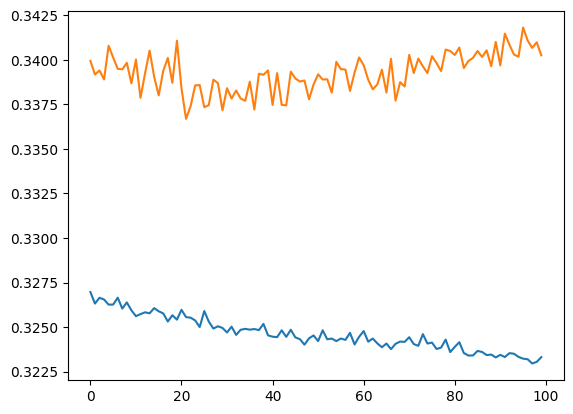

In [182]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

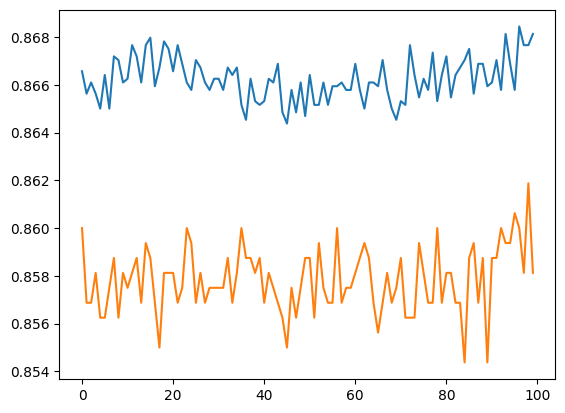

In [183]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])